# Superstore Analysis #

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [9]:
dataset = pd.read_csv('SuperStore_Orders.csv', sep = ",", encoding="ISO-8859-1")
dataset.head()

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
0,AG-2011-2040,01-01-2011,06-01-2011,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,...,Office Supplies,Storage,"Tenex Lockers, Blue",408,2,0.0,106.140,35.46,Medium,2011
1,IN-2011-47883,01-01-2011,08-01-2011,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Office Supplies,Supplies,"Acme Trimmer, High Speed",120,3,0.1,36.036,9.72,Medium,2011
2,HU-2011-1220,01-01-2011,05-01-2011,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,...,Office Supplies,Storage,"Tenex Box, Single Width",66,4,0.0,29.640,8.17,High,2011
3,IT-2011-3647632,01-01-2011,05-01-2011,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,...,Office Supplies,Paper,"Enermax Note Cards, Premium",45,3,0.5,-26.055,4.82,High,2011
4,IN-2011-47883,01-01-2011,08-01-2011,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",114,5,0.1,37.770,4.70,Medium,2011


In [44]:
# info terkait dataframe
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   order_id        51290 non-null  object        
 1   order_date      51290 non-null  datetime64[ns]
 2   ship_date       51290 non-null  datetime64[ns]
 3   ship_mode       51290 non-null  object        
 4   customer_name   51290 non-null  object        
 5   segment         51290 non-null  object        
 6   state           51290 non-null  object        
 7   country         51290 non-null  object        
 8   market          51290 non-null  object        
 9   region          51290 non-null  object        
 10  product_id      51290 non-null  object        
 11  category        51290 non-null  object        
 12  sub_category    51290 non-null  object        
 13  product_name    51290 non-null  object        
 14  sales           51290 non-null  int64         
 15  qu

In [36]:
dataset['sales'] = dataset['sales'].replace(r'[^0-9.\-]', '', regex=True)

dataset['sales'] = pd.to_numeric(dataset['sales'], errors='coerce')

In [10]:
print(dataset.isnull().sum())

order_id          0
order_date        0
ship_date         0
ship_mode         0
customer_name     0
segment           0
state             0
country           0
market            0
region            0
product_id        0
category          0
sub_category      0
product_name      0
sales             0
quantity          0
discount          0
profit            0
shipping_cost     0
order_priority    0
year              0
dtype: int64


In [19]:
store_sum = dataset.groupby('product_id')['quantity'].agg('sum').reset_index(name='sum')
store_sum

,product_id,sum
0,FUR-ADV-10000002,3
1,FUR-ADV-10000108,7
2,FUR-ADV-10000183,31
3,FUR-ADV-10000188,7
4,FUR-ADV-10000190,2
...,...,...
10287,TEC-STA-10004181,11
10288,TEC-STA-10004536,6
10289,TEC-STA-10004542,23
10290,TEC-STA-10004834,5


In [16]:
store_count.sort_values(by='sum', ascending=False)

,product_id,sum
3216,OFF-AR-10003651,163
3736,OFF-BI-10002799,130
3242,OFF-AR-10003829,117
3622,OFF-BI-10001808,112
3847,OFF-BI-10003708,111
...,...,...
10255,TEC-SHA-10001976,1
6198,OFF-PA-10001448,1
12,FUR-ADV-10002329,1
10266,TEC-SHA-10004658,1


In [24]:
segment_analisis = dataset.groupby('segment').agg(
     total_profit = ('profit','sum'),
    total_sales = ('quantity','sum')
).reset_index()
segment_analisis

,segment,total_profit,total_sales
0,Consumer,749239.78206,92157
1,Corporate,442785.85866,53565
2,Home Office,277009.18056,32590


In [26]:
import matplotlib.pyplot as plt

In [33]:
# Group berdasarkan ship_mode
ship_efficiency = dataset.groupby("ship_mode").agg(
    avg_shipping_cost=("shipping_cost", "mean"),
    avg_lead_time=("lead_time", "mean"),
    count_orders=("order_id", "count")
).reset_index()

ship_efficiency

,ship_mode,avg_shipping_cost,avg_lead_time,count_orders
0,First Class,41.053065,2.181746,7505
1,Same Day,42.937453,0.037394,2701
2,Second Class,30.469747,3.230187,10309
3,Standard Class,19.971755,4.998018,30775


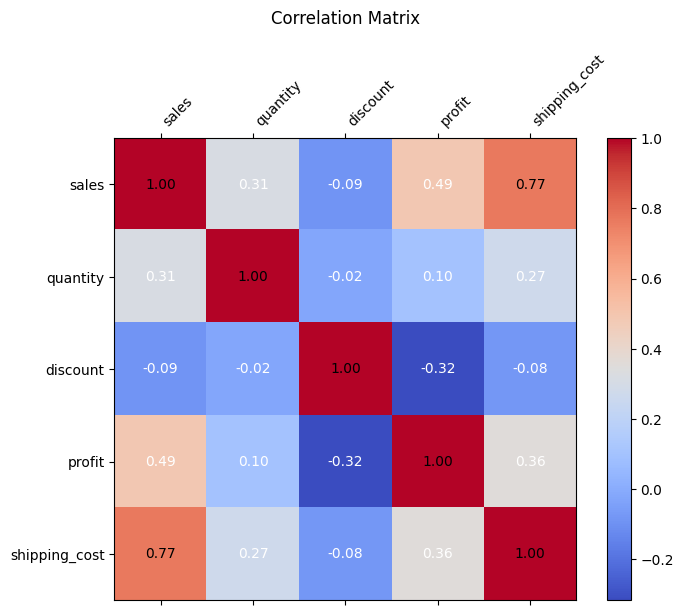

                  sales  quantity  discount    profit  shipping_cost
sales          1.000000  0.313580 -0.086728  0.485944       0.768075
quantity       0.313580  1.000000 -0.019875  0.104743       0.272649
discount      -0.086728 -0.019875  1.000000 -0.316375      -0.079056
profit         0.485944  0.104743 -0.316375  1.000000       0.357033
shipping_cost  0.768075  0.272649 -0.079056  0.357033       1.000000


In [39]:
# Pilih kolom numerik yang mau dianalisis
numeric_cols = ["sales", "quantity", "discount", "profit", "shipping_cost"]

# Hitung korelasi
corr = dataset[numeric_cols].corr()

# Plot korelasi
fig, ax = plt.subplots(figsize=(8, 6))
cax = ax.matshow(corr, cmap="coolwarm")

# Tambahkan colorbar
plt.colorbar(cax)

# Tampilkan label
ax.set_xticks(range(len(corr.columns)))
ax.set_yticks(range(len(corr.columns)))
ax.set_xticklabels(corr.columns, rotation=45, ha="left")
ax.set_yticklabels(corr.columns)

# Tampilkan nilai korelasi di dalam sel
for (i, j), val in np.ndenumerate(corr):
    ax.text(j, i, f"{val:.2f}", ha='center', va='center', color='white' if abs(val) < 0.5 else 'black')

plt.title("Correlation Matrix", pad=20)
plt.show()

# Print nilai korelasi
print(corr)

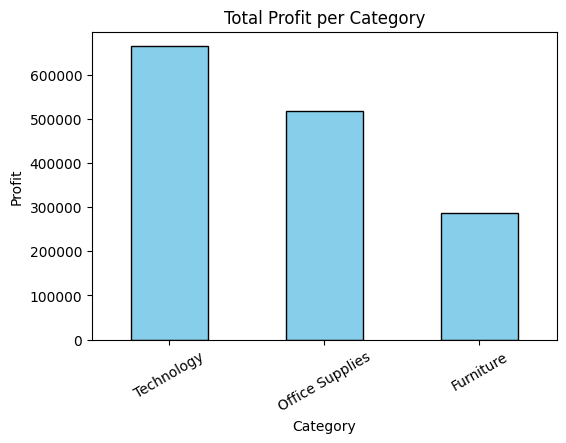

In [40]:
import matplotlib.pyplot as plt

# Profit per Category
profit_category = dataset.groupby("category")["profit"].sum().sort_values(ascending=False)

plt.figure(figsize=(6,4))
profit_category.plot(kind="bar", color="skyblue", edgecolor="black")
plt.title("Total Profit per Category")
plt.ylabel("Profit")
plt.xlabel("Category")
plt.xticks(rotation=30)
plt.show()

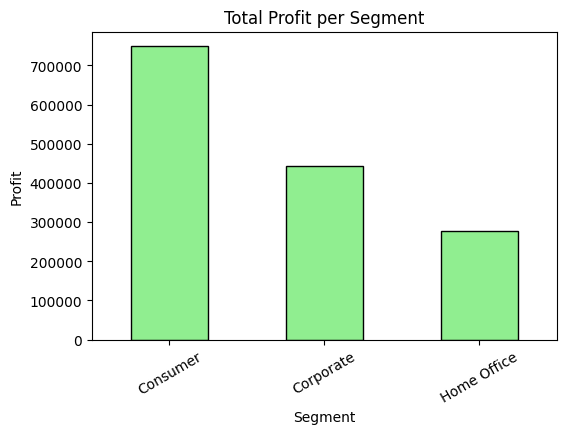

In [41]:
# Profit per Segment
profit_segment = dataset.groupby("segment")["profit"].sum().sort_values(ascending=False)

plt.figure(figsize=(6,4))
profit_segment.plot(kind="bar", color="lightgreen", edgecolor="black")
plt.title("Total Profit per Segment")
plt.ylabel("Profit")
plt.xlabel("Segment")
plt.xticks(rotation=30)
plt.show()

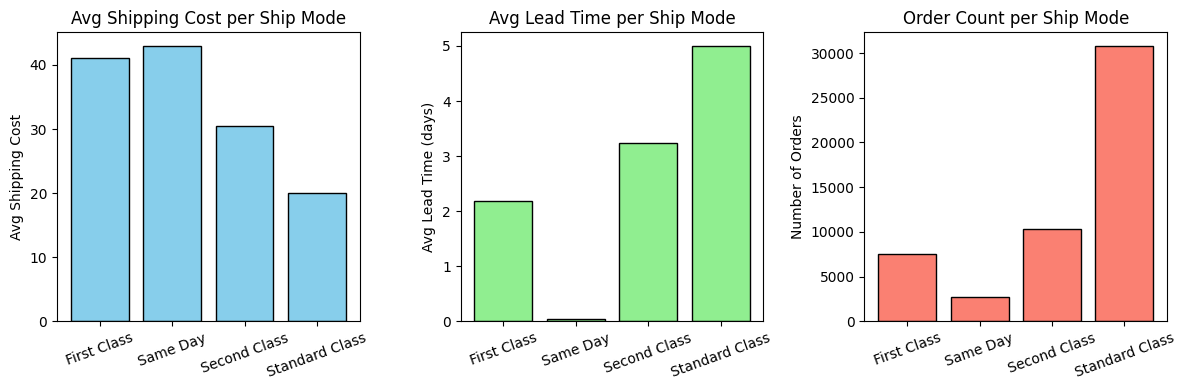

In [42]:
# --- Plot 1: Average Shipping Cost ---
plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
plt.bar(ship_efficiency["ship_mode"], ship_efficiency["avg_shipping_cost"], color="skyblue", edgecolor="black")
plt.title("Avg Shipping Cost per Ship Mode")
plt.ylabel("Avg Shipping Cost")
plt.xticks(rotation=20)

# --- Plot 2: Average Lead Time ---
plt.subplot(1,3,2)
plt.bar(ship_efficiency["ship_mode"], ship_efficiency["avg_lead_time"], color="lightgreen", edgecolor="black")
plt.title("Avg Lead Time per Ship Mode")
plt.ylabel("Avg Lead Time (days)")
plt.xticks(rotation=20)

# --- Plot 3: Count Orders ---
plt.subplot(1,3,3)
plt.bar(ship_efficiency["ship_mode"], ship_efficiency["count_orders"], color="salmon", edgecolor="black")
plt.title("Order Count per Ship Mode")
plt.ylabel("Number of Orders")
plt.xticks(rotation=20)

plt.tight_layout()
plt.show()

In [48]:
# Hitung agregasi per kombinasi ship_mode dan category
shipmode_analysis = (
    dataset.groupby(['ship_mode', 'category'])
      .agg(total_sales=('sales', 'sum'),
           total_profit=('profit', 'sum'),
           total_shipping=('shipping_cost', 'sum'))
      .reset_index()
)

# Hitung margin terhadap sales
shipmode_analysis['margin_ratio'] = shipmode_analysis['total_profit'] / shipmode_analysis['total_sales']

# Hitung porsi shipping cost terhadap sales
shipmode_analysis['shipping_ratio'] = shipmode_analysis['total_shipping'] / shipmode_analysis['total_sales']

# Hasil analisis
print(shipmode_analysis)

         ship_mode         category  total_sales  total_profit  \
0      First Class        Furniture       587573   45807.50020   
1      First Class  Office Supplies       557507   71015.18220   
2      First Class       Technology       685987   91281.99280   
3         Same Day        Furniture       199861   18797.42350   
4         Same Day  Office Supplies       196468   28335.00450   
5         Same Day       Technology       270873   29040.63980   
6     Second Class        Furniture       817509   44294.14010   
7     Second Class  Office Supplies       801332  111871.66700   
8     Second Class       Technology       946906  137995.24998   
9   Standard Class        Furniture      2505941  177883.19000   
10  Standard Class  Office Supplies      2232023  307251.98060   
11  Standard Class       Technology      2840925  405460.85060   

    total_shipping  margin_ratio  shipping_ratio  
0        102861.90      0.077961        0.175062  
1         92311.94      0.127380       

In [47]:
# Hitung margin rata-rata per kategori
margin_per_category = (
    dataset.groupby('category')
      .agg(total_sales=('sales', 'sum'),
           total_profit=('profit', 'sum'))
      .reset_index()
)

# Tambahkan kolom margin rata-rata
margin_per_category['avg_margin'] = (
    margin_per_category['total_profit'] / margin_per_category['total_sales']
)

# Hasil
print(margin_per_category)

          category  total_sales  total_profit  avg_margin
0        Furniture      4110884  286782.25380    0.069762
1  Office Supplies      3787330  518473.83430    0.136897
2       Technology      4744691  663778.73318    0.139899
